<a href="https://colab.research.google.com/github/mayankpiplodiya/AI-Ml/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [29]:
df =pd.read_csv('Titanic-Dataset.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,0.0,1.0,0.121348,1.0,0.346154,0.333333,0.0,0.769118,0.0,1.00000,0.666667
1,0.001124,1.0,0.0,0.213483,0.0,0.653846,0.333333,0.0,0.876471,0.0,0.55102,0.000000
2,0.002247,1.0,1.0,0.396629,0.0,0.423077,0.000000,0.0,0.983824,0.0,1.00000,0.666667
3,0.003371,1.0,0.0,0.305618,0.0,0.596154,0.333333,0.0,0.072059,0.0,0.37415,0.666667
4,0.004494,0.0,1.0,0.016854,1.0,0.596154,0.000000,0.0,0.694118,0.0,1.00000,0.666667


In [63]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000
mean,0.500000,0.383838,0.654321,0.500000,0.647587,0.489240,0.150767,0.172840,0.497836,0.0,0.889416,0.512907
std,0.289162,0.486592,0.418036,0.289162,0.477990,0.260075,0.262686,0.331633,0.295369,0.0,0.245063,0.264744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.250000,0.000000,0.500000,0.250000,0.000000,0.310096,0.000000,0.000000,0.233088,0.0,1.000000,0.333333
50%,0.500000,0.000000,1.000000,0.500000,1.000000,0.461538,0.000000,0.000000,0.495588,0.0,1.000000,0.666667
75%,0.750000,1.000000,1.000000,0.750000,1.000000,0.653846,0.333333,0.000000,0.763971,0.0,1.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [31]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)

Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Continuous Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns


In [66]:
mean_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = mean_imputer.fit_transform(df[numerical_columns])


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    float64
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    float64
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    float64
dtypes: float64(12)
memory usage: 83.7 KB


In [69]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [73]:
print(df.dtypes)


PassengerId    float64
Survived       float64
Pclass         float64
Name           float64
Sex            float64
Age            float64
SibSp          float64
Parch          float64
Ticket         float64
Fare           float64
Cabin          float64
Embarked       float64
dtype: object


In [59]:
#Standardization z score scaling
from sklearn.preprocessing import StandardScaler
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [60]:
# Normalization using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    float64
 4   Sex          891 non-null    float64
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    float64
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    float64
dtypes: float64(12)
memory usage: 83.7 KB


<Axes: xlabel='PassengerId'>

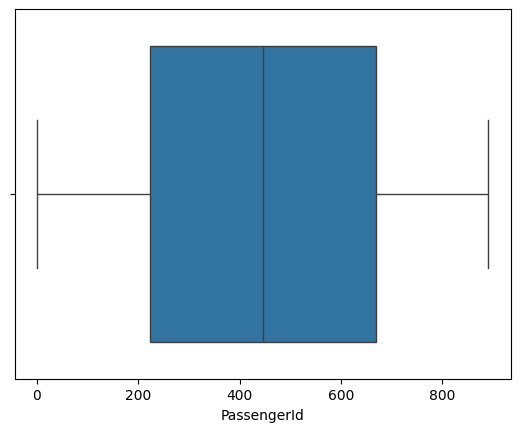

In [33]:
sns.boxplot(x='PassengerId',data=df)

<Axes: xlabel='Survived'>

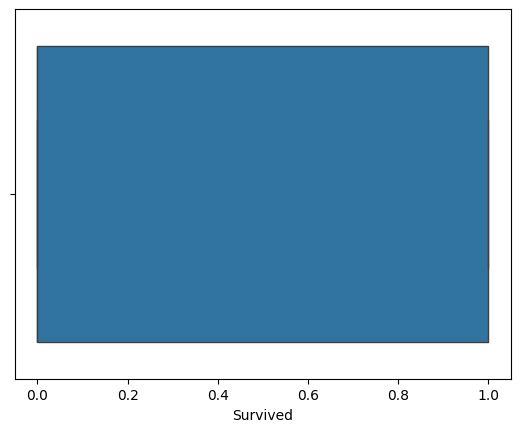

In [34]:
sns.boxplot(x='Survived',data=df)

<Axes: xlabel='Pclass'>

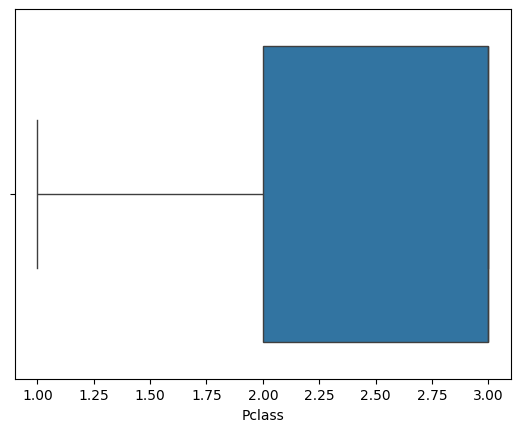

In [35]:
sns.boxplot(x='Pclass',data=df)

<Axes: xlabel='Age'>

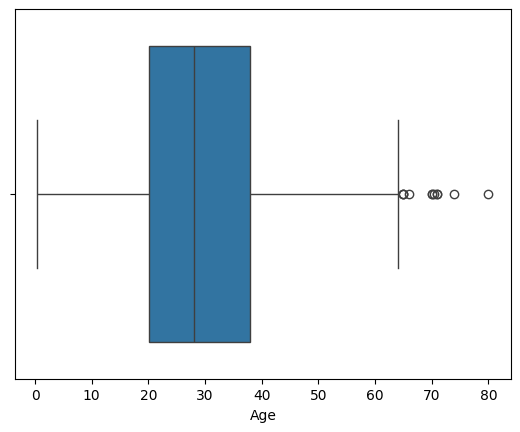

In [36]:
sns.boxplot(x='Age',data=df)

In [37]:
#Outliers removal
print(df['Age'].quantile(0.05))
print(df['Age'].quantile(0.95))

4.0
56.0


In [38]:
df['Age']=np.where(df['Age']>56.0,56.0,df['Age'])
df['Age']=np.where(df['Age']<4.0,4.0,df['Age'])

<Axes: ylabel='Age'>

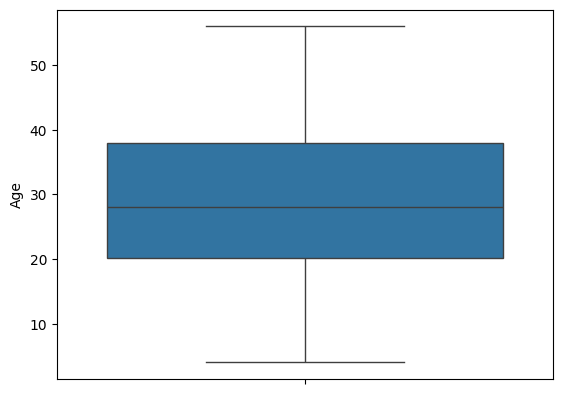

In [39]:
sns.boxplot(df['Age'])

<Axes: xlabel='SibSp'>

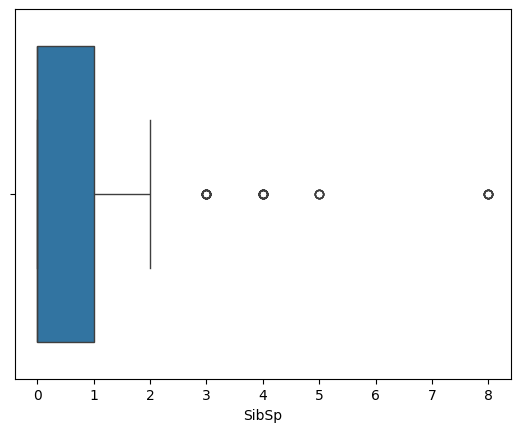

In [40]:
sns.boxplot(x='SibSp',data=df)

In [41]:

print(df['SibSp'].quantile(0.05))
print(df['SibSp'].quantile(0.95))

0.0
3.0


In [42]:
df['SibSp']=np.where(df['SibSp']>3.0,3.0,df['SibSp'])
df['SibSp']=np.where(df['SibSp']<0.0,0.0,df['SibSp'])

<Axes: ylabel='SibSp'>

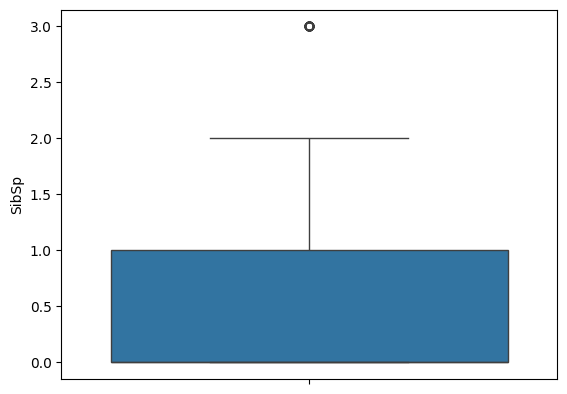

In [43]:
sns.boxplot(df['SibSp'])

<Axes: xlabel='Parch'>

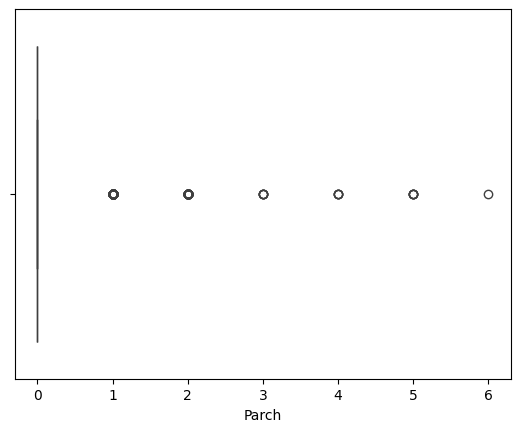

In [44]:
sns.boxplot(x='Parch',data=df)

In [45]:
print(df['Parch'].quantile(0.05))
print(df['Parch'].quantile(0.95))

0.0
2.0


In [46]:
df['Parch']=np.where(df['Parch']>2.0,2.0,df['Parch'])
df['Parch']=np.where(df['Parch']<0.0,0.0,df['Parch'])

<Axes: ylabel='Parch'>

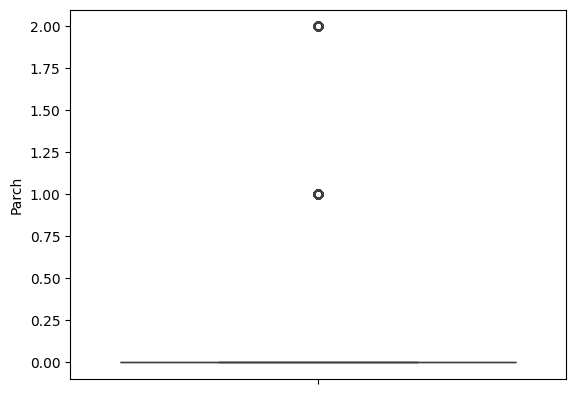

In [47]:
sns.boxplot(df['Parch'])

<Axes: xlabel='Fare'>

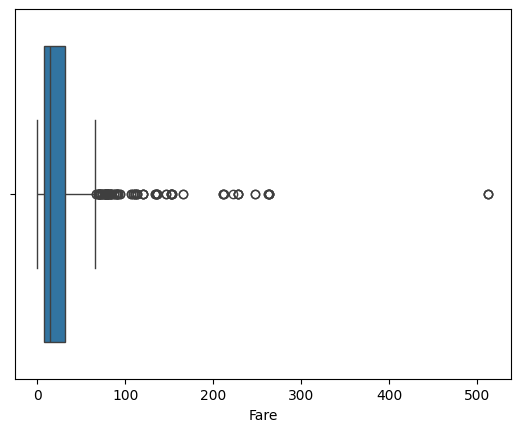

In [48]:
sns.boxplot(x='Fare',data=df)

In [49]:
print(df['Fare'].quantile(0.05))
print(df['Fare'].quantile(0.95))

7.225
112.07915


In [50]:
df['Fare']=np.where(df['Fare']>7.225,7.225,df['Fare'])
df['Fare']=np.where(df['Fare']<112.07915,112.07915,df['Fare'])

<Axes: ylabel='Fare'>

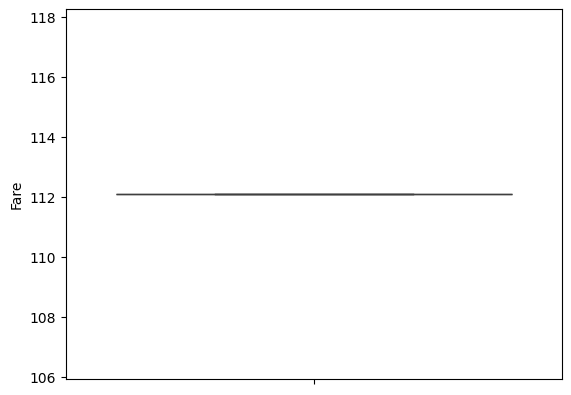

In [51]:
sns.boxplot(df['Fare'])